<a href="https://colab.research.google.com/github/nabin012/ybi-foundation-project/blob/main/Diamond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#importing the dataset
df = pd.read_csv('/content/DiamondPrices.csv')

In [23]:
df

,sn,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [24]:
df.head()

,sn,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sn       53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [26]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [27]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [28]:
df['cut']= df['cut'].map({'Ideal':0, 'Premium':1, 'Very Good':2, 'Good':3, "Fair":4})

In [29]:
df

,sn,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,0,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,1,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,3,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,1,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,3,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,0,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,3,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,2,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,1,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [30]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [31]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [32]:
df['color']= df['color'].map({'G':0, 'E':1, 'F':2, 'H':3, "D":4,'I':5, 'J':6})

In [33]:
df

,sn,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,0,1,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,1,1,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,3,1,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,1,5,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,3,6,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,0,4,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,3,4,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,2,4,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,1,3,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [34]:
df.head()

,sn,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,0,1,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,1,1,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,3,1,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,1,5,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,3,6,SI2,63.3,58.0,335,4.34,4.35,2.75


In [35]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [37]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [38]:
df['clarity']= df['clarity'].map({'SI1':0, 'VS2':1, 'SI2':2, 'VS1':3, "VVS2":4,'VVS1':5, 'IF':6,'I1':7})

In [39]:
df.head()

,sn,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,0,1,2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,1,1,0,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,1,5,1,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,3,6,2,63.3,58.0,335,4.34,4.35,2.75


In [40]:
X=df.drop('price',axis=1)

In [42]:
X.shape


(53940, 10)

In [49]:
y=df[['price']]

In [50]:
y.shape

(53940, 1)

In [45]:
X.head()

,sn,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,0,1,2,61.5,55.0,3.95,3.98,2.43
1,2,0.21,1,1,0,59.8,61.0,3.89,3.84,2.31
2,3,0.23,3,1,3,56.9,65.0,4.05,4.07,2.31
3,4,0.29,1,5,1,62.4,58.0,4.20,4.23,2.63
4,5,0.31,3,6,2,63.3,58.0,4.34,4.35,2.75


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((43152, 10), (10788, 10), (43152, 1), (10788, 1))

In [53]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [54]:
model.fit(X_train,y_train)

LinearRegression()

In [55]:
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import r2_score

In [62]:
r2_score(y_test,y_pred)

0.8703205631591499

In the code above, I first trained a machine learning model using the linear regression algorithm and then calculated its r squared score. The R2 score of the model trained here is 0.87 which is not bad. If the value of the r squared score is 1, it means that the model is perfect and if its value is 0, it means that the model will perform badly on an unseen dataset. This also implies that the closer the value of the r squared score is to 1, the more perfectly the model is trained.

In [64]:
p=pd.DataFrame(np.c_[y_pred,y_test],columns=["Predicted prices","Actual Prices"])

In [65]:
p

,Predicted prices,Actual Prices
0,637.172493,559.0
1,2400.477935,2201.0
2,1519.325805,1238.0
3,1573.300645,1304.0
4,10500.302310,6901.0
...,...,...
10783,1732.008228,1554.0
10784,21.374071,633.0
10785,838.447250,761.0
10786,7676.779758,9836.0


In [66]:
p.head()

,Predicted prices,Actual Prices
0,637.172493,559.0
1,2400.477935,2201.0
2,1519.325805,1238.0
3,1573.300645,1304.0
4,10500.302310,6901.0


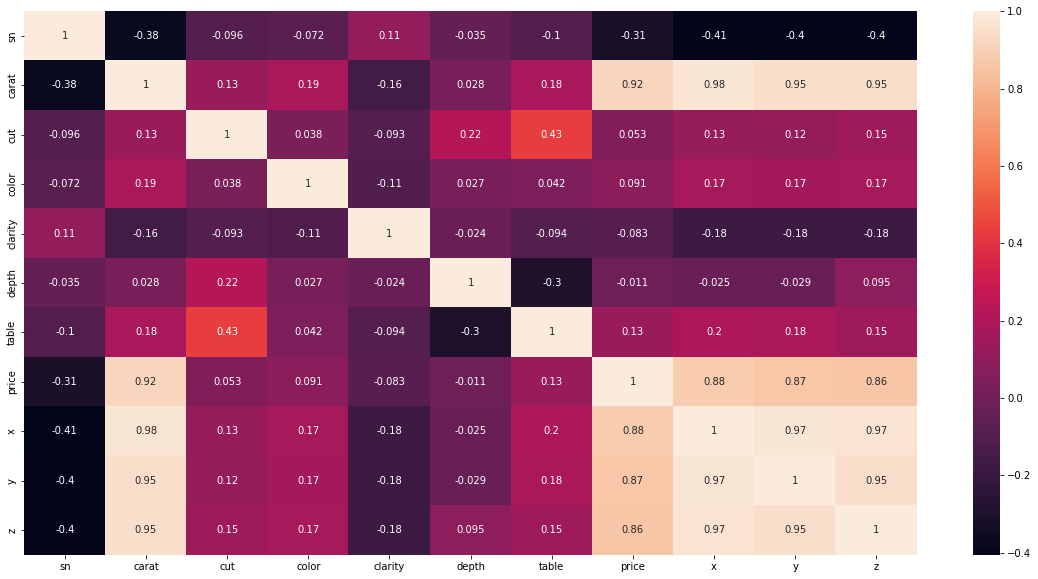

In [67]:
#Feature Extraction part
plt.figure(figsize=(20,10))
cor = df.corr()
heat = sns.heatmap(df.corr(), annot=True)

In [69]:
#Correlation with output variable
cor_target = abs(cor["price"])

In [70]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

carat    0.921591
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

You can see the above 5 feature is mostly corelated to the each other so we can ignore other data set and can take these data set and make the prediction